In [1]:
import pandas as pd
import numpy as np
import random
import statsmodels as sm
import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib.pyplot as plt

# Linear Regression Tests
Basic tests of the linear regression method in statsmodels. From the cases below, it appears transforming the data before modeling is more effective, than applying a transformation in the model (in this case, the formula).

## 1. Straight line + noise

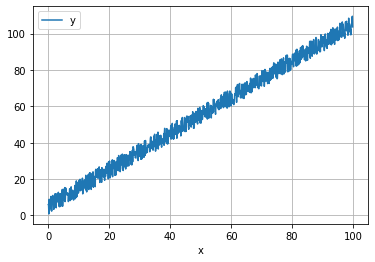

In [2]:
xlist = np.arange(0,1000)/10.
ylist = [x + 10*random.random() for x in xlist]

df_line = pd.DataFrame(zip(xlist,ylist), columns=['x','y'])
df_line.plot(x='x')
plt.grid()

In [3]:
# linear fit
results = smf.ols('y ~ x ', data=df_line).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 9.902e+04
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:43:57   Log-Likelihood:                -2480.5
No. Observations:                1000   AIC:                             4965.
Df Residuals:                     998   BIC:                             4975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1673      0.183     28.254      0.0

In [4]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  Intercept    5.167328
x            0.997579
dtype: float64
R2:  0.9900221917388302


In [5]:
# prediction statistics
pred_ols = results.get_prediction()
df_line_pred_stats = pred_ols.summary_frame()

df_line_pred_stats

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.167328,0.182890,4.808434,5.526222,-0.522867,10.857523
1,5.267086,0.182616,4.908730,5.625441,-0.423076,10.957247
2,5.366844,0.182342,5.009027,5.724661,-0.323284,11.056971
3,5.466602,0.182068,5.109322,5.823881,-0.223492,11.156695
4,5.566360,0.181794,5.209618,5.923101,-0.123700,11.256420
...,...,...,...,...,...,...
995,104.426485,0.181794,104.069744,104.783227,98.736425,110.116545
996,104.526243,0.182068,104.168964,104.883522,98.836149,110.216337
997,104.626001,0.182342,104.268184,104.983818,98.935873,110.316128
998,104.725759,0.182616,104.367404,105.084114,99.035598,110.415920


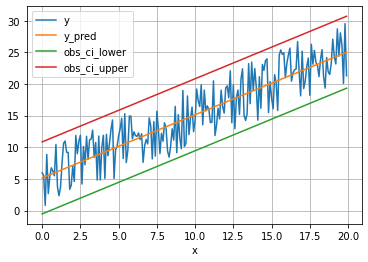

In [6]:
# predicted values
df_line['y_pred'] = results.fittedvalues

# confidence intervals
df_line['obs_ci_lower'] = results.get_prediction().summary_frame()['obs_ci_lower']
df_line['obs_ci_upper'] = results.get_prediction().summary_frame()['obs_ci_upper']

df_line[:200].plot(x='x')
plt.grid()

In [7]:
%%html
<hr>

## 2. Quadratic + noise

### 2.1 Regular model

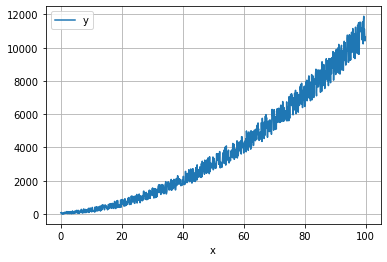

In [8]:
xlist = np.arange(0,1000)/10.
ylist = [(x + 10 * random.random())**2 for x in xlist]

df_quad = pd.DataFrame(zip(xlist,ylist), columns=['x','y'])
df_quad[:].plot(x='x')
plt.grid()

In [9]:
# quadratic fit
# using the pow() function is more effective than x**2
results = smf.ols('y ~ pow(x,2)', data=df_quad).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 8.077e+04
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:43:57   Log-Likelihood:                -7311.9
No. Observations:                1000   AIC:                         1.463e+04
Df Residuals:                     998   BIC:                         1.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    205.1318     17.206     11.922      0.0

In [10]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  Intercept    205.131766
pow(x, 2)      1.094798
dtype: float64
R2:  0.9877946372724664


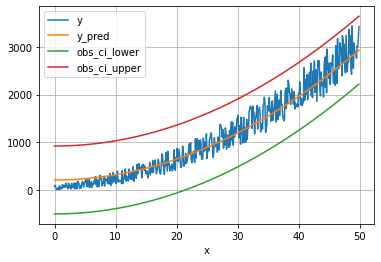

In [11]:
# predicted values
df_quad['y_pred'] = results.fittedvalues

# confidence intervals
df_quad['obs_ci_lower'] = results.get_prediction().summary_frame()['obs_ci_lower']
df_quad['obs_ci_upper'] = results.get_prediction().summary_frame()['obs_ci_upper']

df_quad[:500].plot(x='x')
plt.grid()

### 2.2 Linearized model (better method)

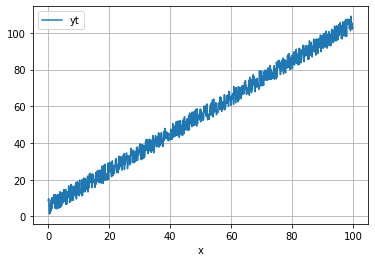

In [12]:
# transform data by taking square root
df_quad['yt'] = (df_quad['y'])**(1./2)
df_quad[:].plot(x='x',y=['yt'])
plt.grid()

In [13]:
# fit the transformed endogenous variables
results = smf.ols('yt ~ x', data=df_quad).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     yt   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.014e+05
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:43:58   Log-Likelihood:                -2469.3
No. Observations:                1000   AIC:                             4943.
Df Residuals:                     998   BIC:                             4952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0207      0.181     27.762      0.0

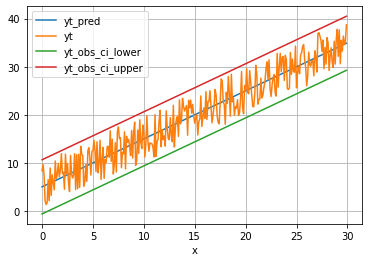

In [14]:
# linearized form of the data 

# predicted values
df_quad['yt_pred'] = results.fittedvalues

# confidence intervals
df_quad['yt_obs_ci_lower'] = results.get_prediction().summary_frame()['obs_ci_lower']
df_quad['yt_obs_ci_upper'] = results.get_prediction().summary_frame()['obs_ci_upper']

df_quad[:300].plot(x='x', y=['yt_pred', 'yt', 'yt_obs_ci_lower', 'yt_obs_ci_upper'])
plt.grid()

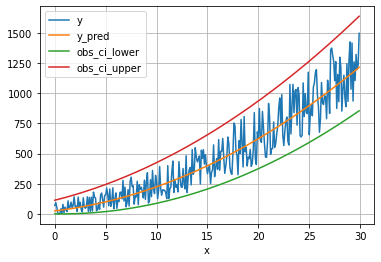

In [15]:
# transform the data back to original form by taking the square of the endogenous variable

df_quad['y_pred'] = df_quad['yt_pred']**2

# confidence intervals
df_quad['obs_ci_lower'] = df_quad['yt_obs_ci_lower']**2
df_quad['obs_ci_upper'] = df_quad['yt_obs_ci_upper']**2

df_quad[:300].plot(x='x', y=['y', 'y_pred', 'obs_ci_lower', 'obs_ci_upper'])
plt.grid()

In [16]:
%%html
<hr>

## 3. Cubic + noise

### 3.1 Regular model

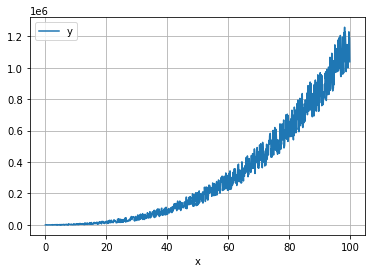

In [17]:
xlist = np.arange(0,1000)/10.
ylist = [(x + 10 * random.random())**3 for x in xlist]

df_cube = pd.DataFrame(zip(xlist,ylist), columns=['x','y'])
df_cube[:].plot(x='x')
plt.grid()

In [18]:
# cubic fit
results = smf.ols('y ~ pow(x,3) ', data=df_cube).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 5.412e+04
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:43:58   Log-Likelihood:                -12123.
No. Observations:                1000   AIC:                         2.425e+04
Df Residuals:                     998   BIC:                         2.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.547e+04   1879.210      8.230      0.0

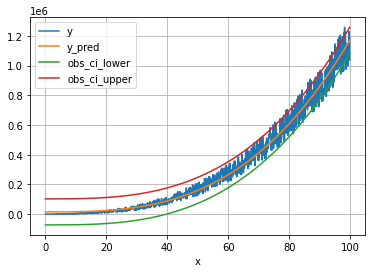

In [19]:
# predicted values
df_cube['y_pred'] = results.fittedvalues

# confidence intervals
df_cube['obs_ci_lower'] = results.get_prediction().summary_frame()['obs_ci_lower']
df_cube['obs_ci_upper'] = results.get_prediction().summary_frame()['obs_ci_upper']

df_cube[:].plot(x='x')
plt.grid()

### 3.2 Linearized model (better method)

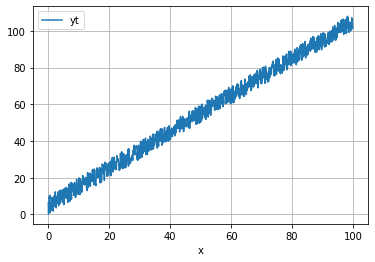

In [20]:
# transform data by taking cubic root
df_cube['yt'] = (df_cube['y'])**(1./3)
df_cube[:].plot(x='x',y=['yt'])
plt.grid()

In [21]:
# cubic fit
results = smf.ols('yt ~ x', data=df_cube).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     yt   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.001e+05
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:43:59   Log-Likelihood:                -2474.3
No. Observations:                1000   AIC:                             4953.
Df Residuals:                     998   BIC:                             4962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2371      0.182     28.815      0.0

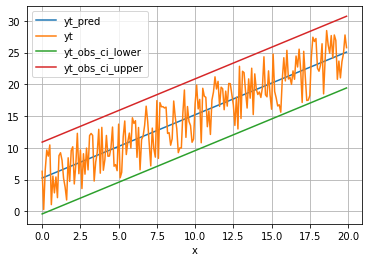

In [22]:
# linearized form of the data 

# predicted values
df_cube['yt_pred'] = results.fittedvalues

# confidence intervals
df_cube['yt_obs_ci_lower'] = results.get_prediction().summary_frame()['obs_ci_lower']
df_cube['yt_obs_ci_upper'] = results.get_prediction().summary_frame()['obs_ci_upper']

df_cube[:200].plot(x='x', y=['yt_pred', 'yt', 'yt_obs_ci_lower', 'yt_obs_ci_upper'])
plt.grid()

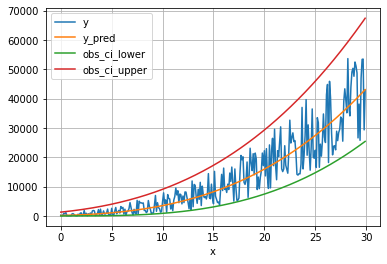

In [23]:
# transform the data back to original form by taking the square of the endogenous variable

df_cube['y_pred'] = df_cube['yt_pred']**3

# confidence intervals
df_cube['obs_ci_lower'] = df_cube['yt_obs_ci_lower']**3
df_cube['obs_ci_upper'] = df_cube['yt_obs_ci_upper']**3

df_cube[:300].plot(x='x', y=['y', 'y_pred', 'obs_ci_lower', 'obs_ci_upper'])
plt.grid()

In [24]:
%%html
<hr>

## 4. Logarithmic + noise

It appears simpler to model the transformed data than to model it directly with a logarithm function in the formula

### 4.1 Regular model
Fails with np.log() in the formula

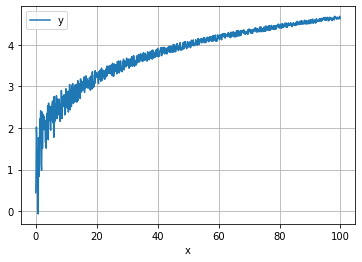

In [25]:
xlist = np.arange(0,1000)/10.
ylist = [np.log(x + 10 * random.random()) for x in xlist]

df_log = pd.DataFrame(zip(xlist,ylist), columns=['x','y'])
df_log[:].plot(x='x')
plt.grid()

In [26]:
# cubic fit
results = smf.ols('y ~ np.log(x) ', data=df_cube).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 03 Sep 2021   Prob (F-statistic):                nan
Time:                        18:43:59   Log-Likelihood:                    nan
No. Observations:                1000   AIC:                               nan
Df Residuals:                    1000   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept         nan        nan        nan        n

/Users/elmo/Documents/python3_venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### 4.2 Linearized model (better method)

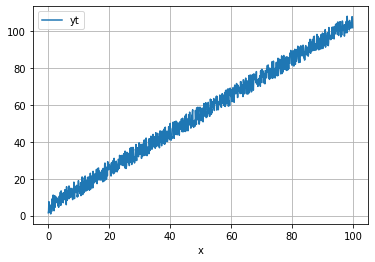

In [27]:
# transform data by taking the exponential of y
df_log['yt'] = np.exp(df_log['y'])
df_log[:].plot(x='x',y='yt')
plt.grid()

In [28]:
# log fit the transformed y value
results = smf.ols('yt ~ x ', data=df_log).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     yt   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.031e+05
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:44:00   Log-Likelihood:                -2467.9
No. Observations:                1000   AIC:                             4940.
Df Residuals:                     998   BIC:                             4950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7390      0.181     26.242      0.0

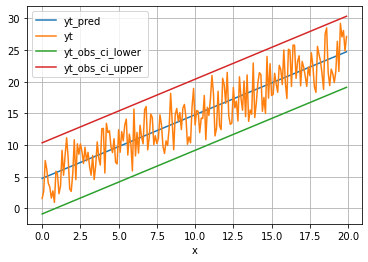

In [29]:
# linearized form of the data 

# predicted values
df_log['yt_pred'] = results.fittedvalues

# confidence intervals
df_log['yt_obs_ci_lower'] = results.get_prediction().summary_frame()['obs_ci_lower']
df_log['yt_obs_ci_upper'] = results.get_prediction().summary_frame()['obs_ci_upper']

df_log[:200].plot(x='x', y=['yt_pred', 'yt', 'yt_obs_ci_lower', 'yt_obs_ci_upper'])
plt.grid()

/Users/elmo/Documents/python3_venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


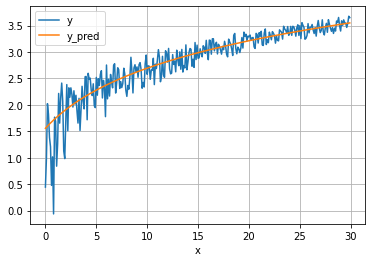

In [30]:
# transform the data back to original form by taking the square of the endogenous variable

df_log['y_pred'] = np.log(df_log['yt_pred'])

# confidence intervals
df_log['obs_ci_lower'] = np.log(df_log['yt_obs_ci_lower'])
df_log['obs_ci_upper'] = np.log(df_log['yt_obs_ci_upper'])

df_log[:300].plot(x='x', y=['y', 'y_pred'])
plt.grid()